In [ ]:
#Import Library

import pandas as pd
from sklearn.impute import SimpleImputer
#SimpleImputer untuk mengubah semua nilai yang hilang yang ditandai dengan nilai NaN dengan nilai rata-rata untuk kolom tersebut

In [ ]:
#Load dataset
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
# Check Missing Value
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

Terlihat bahwa terdapat missing value pada variabel Car, BuildingArea, YearBuilt, CouncilArea

In [ ]:
# Penanganan Missing Value dengan SimpleImputer

#Mendefinisikan Mengisi nilai yang hilang dengan Median
imputer_numeric = SimpleImputer(strategy='median')
imputer_categorical = SimpleImputer(strategy='most_frequent')

In [ ]:
# Kolom-kolom numerik yang akan diimputasi
columns_numeric = ['Car', 'BuildingArea', 'YearBuilt']

# Pelatihan imputer pada data yang memiliki nilai-nilai yang hilang untuk kolom numerik kemudian mengisi nilai-nilai tersebut dengan median masing-masing kolom.
df[columns_numeric] = imputer_numeric.fit_transform(df[columns_numeric])

# Kolom-kolom kategorikal yang akan diimputasi
columns_categorical = ['CouncilArea']

# Pelatihan imputer pada data yang memiliki nilai-nilai yang hilang untuk kolom kategorikal kemudian mengisi nilai-nilai tersebut dengan median masing-masing kolom.
df[columns_categorical] = imputer_categorical.fit_transform(df[columns_categorical])


In [ ]:
# Menampilkan hasil
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
#Pemilihan Fitur
#membuang fitur-fitur yang tidak relevan

# import libraries
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
#RFE (Recursive Feature Elimination) digunakan untuk pemilihan fitur
#dan DecisionTreeClassifier adalah model pohon keputusan yang akan digunakan untuk mengevaluasi pentingnya setiap fitur.


In [ ]:
# devide predictors and target, to keep things simple, we'll use only numerical predictors
df_predictors = df.drop(['Price'], axis=1)
X = df_predictors.select_dtypes(exclude=['object'])
y = df.Price

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
#Mendefinisikan objek RFE dengan menggunakan model DecisionTreeClassifier sebagai estimator.
# n_features_to_select=5 menentukan bahwa kita ingin memilih 5 fitur terbaik.


In [ ]:
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
    print('Column: %s, Selected=%s, Rank: %d' % (X.columns[i], rfe.support_[i], rfe.ranking_[i]))

#Melakukan iterasi melalui setiap fitur dan mencetak ringkasan untuk masing-masing fitur.
#Meranking fitur

Column: Rooms, Selected=False, Rank: 8
Column: Distance, Selected=True, Rank: 1
Column: Postcode, Selected=False, Rank: 5
Column: Bedroom2, Selected=False, Rank: 7
Column: Bathroom, Selected=False, Rank: 6
Column: Car, Selected=False, Rank: 4
Column: Landsize, Selected=True, Rank: 1
Column: BuildingArea, Selected=True, Rank: 1
Column: YearBuilt, Selected=False, Rank: 2
Column: Lattitude, Selected=True, Rank: 1
Column: Longtitude, Selected=True, Rank: 1
Column: Propertycount, Selected=False, Rank: 3


Enam fitur paling relevan berdasarkan RFE ditandai dengan “Dipilih=Benar” , yakni Distance, landsize, yearbuilt, lattitude, dan longititude

In [ ]:
#Normalisasi menggunakan objek scikit-learn yang disebut MinMaxScaler.

# import library
from sklearn.preprocessing import MinMaxScaler

# Ganti nama kolom sesuai dengan hasil seleksi fitur
selected_column_names = X.columns[rfe.support_]
X_scaled.columns = selected_column_names

# Menampilkan statistik deskriptif untuk fitur yang telah terpilih setelah normalisasi
X_scaled_descriptive = X_scaled.describe()

# Menampilkan hasil
print(X_scaled_descriptive)

           Distance      Landsize  BuildingArea     Lattitude    Longtitude
count  13580.000000  13580.000000  13580.000000  13580.000000  13580.000000
mean       0.210765      0.001290      0.003137      0.482348      0.514742
std        0.122011      0.009216      0.008811      0.102400      0.094940
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.126819      0.000409      0.002741      0.420826      0.454794
50%        0.191268      0.001016      0.002831      0.491195      0.519204
75%        0.270270      0.001503      0.002919      0.550567      0.572382
max        1.000000      1.000000      1.000000      1.000000      1.000000


Text(0.5, 1.0, 'Boxplot Before Outlier Handling')

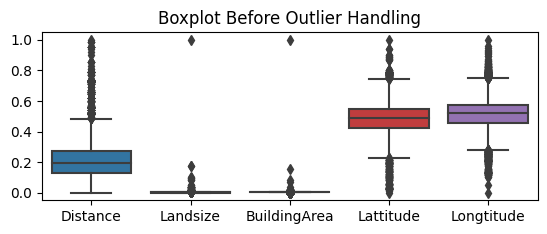

In [ ]:
# Boxplot sebelum penanganan outlier
plt.subplot(2, 1, 1)
sns.boxplot(data=X_scaled)
plt.title('Boxplot Before Outlier Handling')


In [ ]:
# Deteksi dan penanganan outlier pada fitur yang terpilih
plt.figure(figsize=(10, 6))
for column in selected_column_names:
    # Menggunakan IQR untuk mendeteksi outlier
    q1 = X_scaled[column].quantile(0.25)
    q3 = X_scaled[column].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bound
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Trim the outliers
    X_scaled.loc[(X_scaled[column] > upper_bound), column] = upper_bound
    X_scaled.loc[(X_scaled[column] < lower_bound), column] = lower_bound

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Boxplot After Outlier Handling')

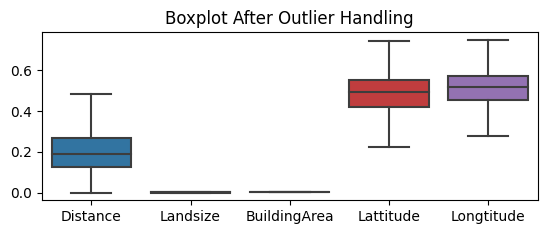

In [ ]:
# Boxplot setelah penanganan outlier
plt.subplot(2, 1, 1)
sns.boxplot(data=X_scaled)
plt.title('Boxplot After Outlier Handling')